In [45]:
import zipfile

zip_path = "/content/archive (1).zip"
extract_path = "/content/cats_dogs_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset Unzipped!")


Dataset Unzipped!


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATASET = "/content/cats_dogs_data"
IMG_SIZE = (150, 150)

gen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

train = gen.flow_from_directory(
    DATASET, target_size=IMG_SIZE, batch_size=32,
    class_mode='binary', subset='training'
)

val = gen.flow_from_directory(
    DATASET, target_size=IMG_SIZE, batch_size=32,
    class_mode='binary', subset='validation'
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


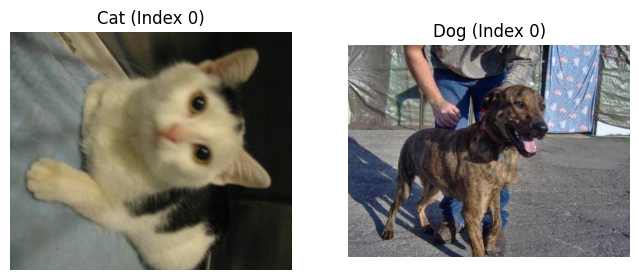

In [57]:
import os
import matplotlib.pyplot as plt
from PIL import Image

CAT_FOLDER = "/content/cats_dogs_data/cats_set"
DOG_FOLDER = "/content/cats_dogs_data/dogs_set"

cat_first = os.listdir(CAT_FOLDER)[1]
dog_first = os.listdir(DOG_FOLDER)[6]

# create full paths
cat_path = os.path.join(CAT_FOLDER, cat_first)
dog_path = os.path.join(DOG_FOLDER, dog_first)

# open images
cat_img = Image.open(cat_path)
dog_img = Image.open(dog_path)

# display
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(cat_img)
plt.title("Cat (Index 0)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(dog_img)
plt.title("Dog (Index 0)")
plt.axis("off")

plt.show()


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPool2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(train, epochs=5, validation_data=val)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.4988 - loss: 1.9036 - val_accuracy: 0.5100 - val_loss: 0.6824
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5513 - loss: 0.6827 - val_accuracy: 0.5850 - val_loss: 0.6639
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6021 - loss: 0.6818 - val_accuracy: 0.5850 - val_loss: 0.6544
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.7605 - loss: 0.5063 - val_accuracy: 0.5650 - val_loss: 0.7152
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8710 - loss: 0.3439 - val_accuracy: 0.5850 - val_loss: 0.7831


In [50]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")


Final Training Accuracy: 85.50%
Final Validation Accuracy: 58.50%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
Prediction: Dog


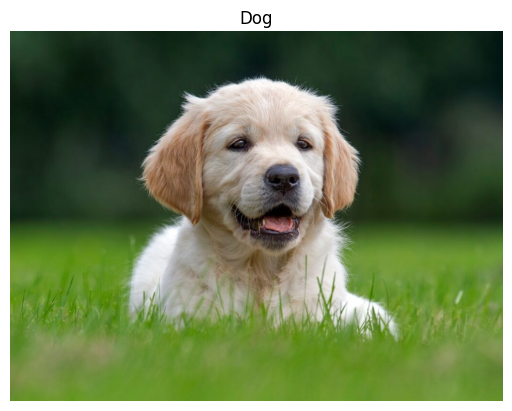

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

test_img = "/content/Dog_Breeds.jpg"

img = image.load_img(test_img, target_size=(150,150))
arr = image.img_to_array(img) / 255.0
arr = np.expand_dims(arr, axis=0)

pred = model.predict(arr)[0][0]
label = "Dog" if pred > 0.5 else "Cat"

print("Prediction:", label)

plt.imshow(image.load_img(test_img))
plt.title(label)
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: Cat


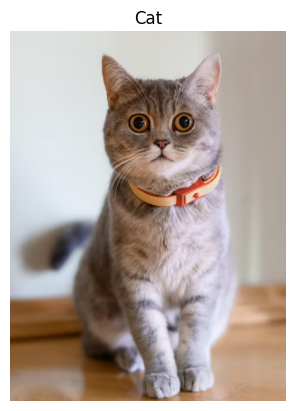

In [52]:
test_img = "/content/cat.png"

img = image.load_img(test_img, target_size=(150,150))
arr = image.img_to_array(img) / 255.0
arr = np.expand_dims(arr, axis=0)

pred = model.predict(arr)[0][0]
label = "Dog" if pred > 0.5 else "Cat"

print("Prediction:", label)

plt.imshow(image.load_img(test_img))
plt.title(label)
plt.axis("off")
plt.show()